In [8]:
import pandas as pd
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
#1- What is the distribution of age among heart failure patients in the dataset.

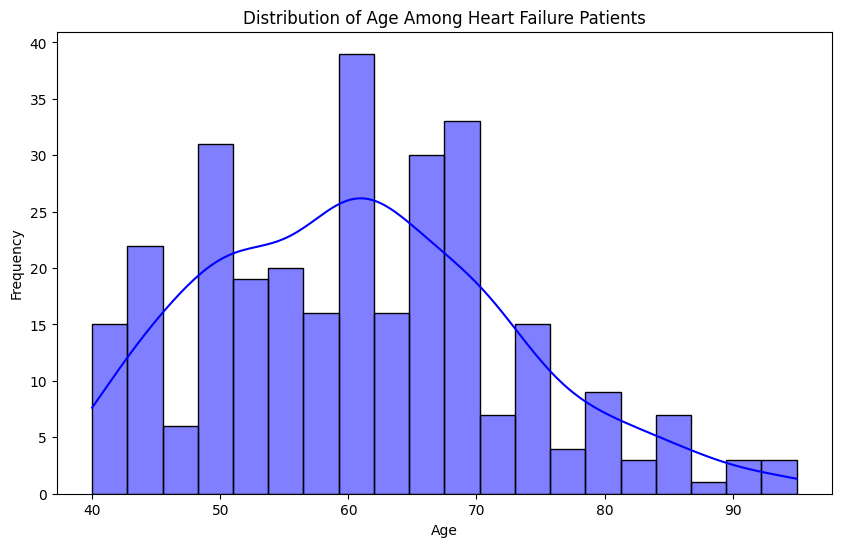

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20, color='blue')

plt.title('Distribution of Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [11]:
#2- How does the death rate vary with age.

/tmp/ipykernel_135145/1287197882.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_death_rate = df.groupby('AgeGroup')['DEATH_EVENT'].mean()
/tmp/ipykernel_135145/1287197882.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_death_rate.index, y=age_group_death_rate.values, palette="viridis")


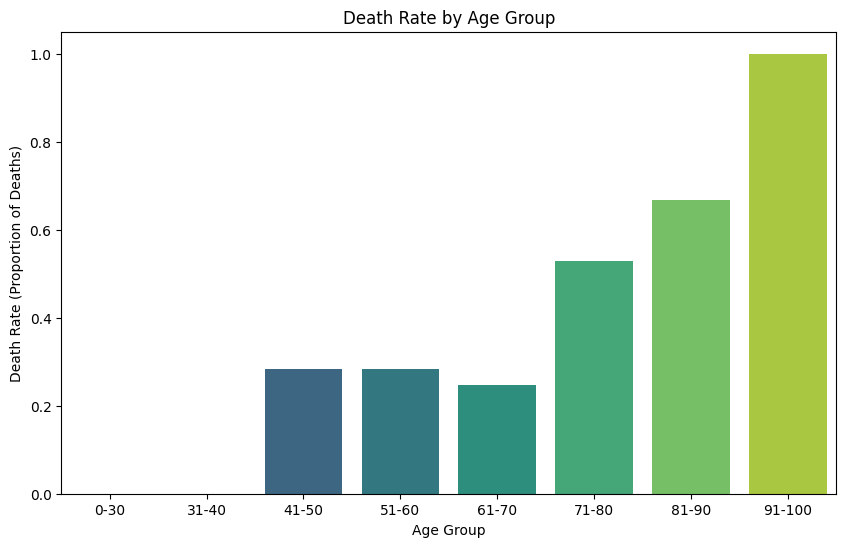

In [18]:
# Create age bins for better categorization
age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['AgeGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Group by AgeGroup and calculate the death rate for each group
age_group_death_rate = df.groupby('AgeGroup')['DEATH_EVENT'].mean()

# Plotting the death rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_death_rate.index, y=age_group_death_rate.values, palette="viridis")

# Adding labels and title
plt.title('Death Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (Proportion of Deaths)')

# Show plot
plt.show()

In [ ]:
#3- What is the percentage of male and female patients in the dataset?

In [19]:
# Calculate the percentage of male (1) and female (0) patients
sex_counts = df['sex'].value_counts(normalize=True) * 100  # Normalize to get percentage

# Mapping for Sex column values (if 0 = female and 1 = male)
sex_counts.index = sex_counts.index.map({0: 'Female', 1: 'Male'})

# Display the percentage of male and female patients
print(sex_counts)

sex
Male      64.882943
Female    35.117057
Name: proportion, dtype: float64


In [20]:
#4- How does the platelet count vary among different age groups?

/tmp/ipykernel_135145/2694321148.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_platelet = df.groupby('AgeGroup')['platelets'].mean()
/tmp/ipykernel_135145/2694321148.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_platelet.index, y=age_group_platelet.values, palette="coolwarm")


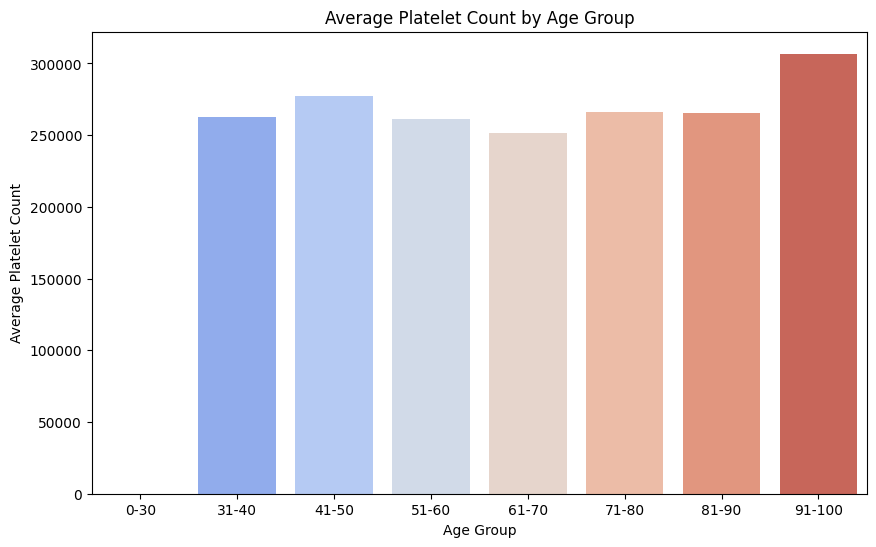

In [21]:
# Create age bins for better categorization
age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['AgeGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Group by age group and calculate the average platelet count for each group
age_group_platelet = df.groupby('AgeGroup')['platelets'].mean()

# Plotting the average platelet count by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_platelet.index, y=age_group_platelet.values, palette="coolwarm")

# Adding labels and title
plt.title('Average Platelet Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Platelet Count')

# Show plot
plt.show()


In [22]:
#5- Is there a correlation between creatinine and sodium levels in the blood?

Correlation between Serum Creatinine and Serum Sodium: -0.1890952100911741


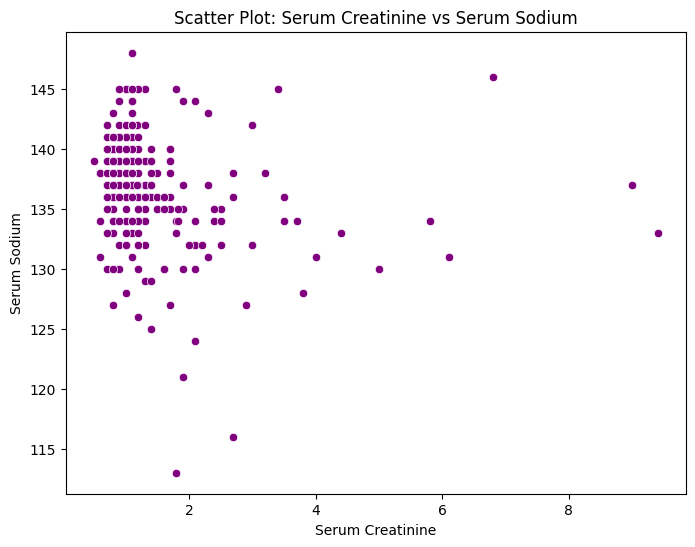

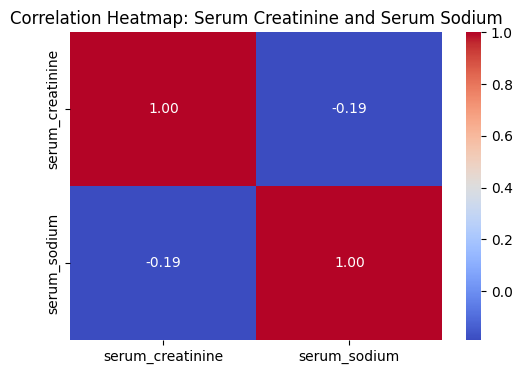

In [25]:
correlation = df['serum_creatinine'].corr(df['serum_sodium'])

# Display the correlation coefficient
print(f'Correlation between Serum Creatinine and Serum Sodium: {correlation}')

# Visualize the correlation with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='serum_creatinine', y='serum_sodium', data=df, color='purple')
plt.title('Scatter Plot: Serum Creatinine vs Serum Sodium')
plt.xlabel('Serum Creatinine')
plt.ylabel('Serum Sodium')
plt.show()

# Optionally, if you want to plot a heatmap for more comprehensive correlation analysis:
correlation_matrix = df[['serum_creatinine', 'serum_sodium']].corr()

# Plotting the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap: Serum Creatinine and Serum Sodium')
plt.show()

In [26]:
#6- How does the prevalence of high blood pressure differ between male and female patients?

sex
Female    41.904762
Male      31.443299
Name: high_blood_pressure, dtype: float64


/tmp/ipykernel_135145/622586656.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_blood_pressure_prevalence.index, y=high_blood_pressure_prevalence.values, palette="pastel")


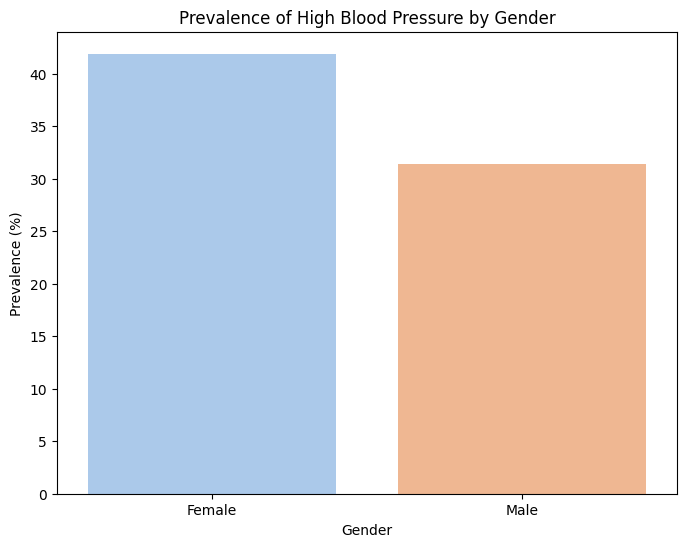

In [28]:
# Map 'sex' column values (0 = Female, 1 = Male) to labels for clarity
df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})

# Calculate the prevalence of high blood pressure (1 = High Blood Pressure, 0 = No High Blood Pressure)
high_blood_pressure_prevalence = df.groupby('sex')['high_blood_pressure'].mean() * 100

# Display the prevalence for Male and Female
print(high_blood_pressure_prevalence)

# Plotting the prevalence of high blood pressure by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=high_blood_pressure_prevalence.index, y=high_blood_pressure_prevalence.values, palette="pastel")

# Adding labels and title
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Prevalence (%)')

# Show plot
plt.show()


In [29]:
#7- What is the relationship between smoking habits and the occurrence of heart failure?

smoking
Non-Smoker    32.512315
Smoker        31.250000
Name: DEATH_EVENT, dtype: float64


/tmp/ipykernel_135145/77041847.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoking_heart_failure.index, y=smoking_heart_failure.values, palette="coolwarm")


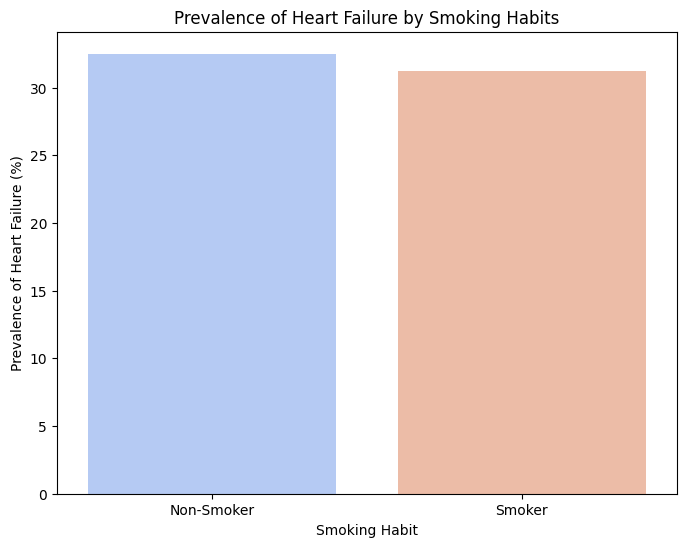

In [30]:
df['smoking'] = df['smoking'].map({0: 'Non-Smoker', 1: 'Smoker'})

# Calculate the prevalence of heart failure (DEATH_EVENT) by smoking habits
smoking_heart_failure = df.groupby('smoking')['DEATH_EVENT'].mean() * 100

# Display the prevalence for smokers and non-smokers
print(smoking_heart_failure)

# Plotting the relationship between smoking and heart failure occurrence
plt.figure(figsize=(8, 6))
sns.barplot(x=smoking_heart_failure.index, y=smoking_heart_failure.values, palette="coolwarm")

# Adding labels and title
plt.title('Prevalence of Heart Failure by Smoking Habits')
plt.xlabel('Smoking Habit')
plt.ylabel('Prevalence of Heart Failure (%)')

# Show plot
plt.show()

In [31]:
#8- Are there any noticeable patterns in the distribution of death events across different age groups?

Age Group
20-30           NaN
30-40           NaN
40-50     23.404255
50-60     24.390244
60-70     29.032258
70-80     38.461538
80-90     68.421053
90-100    83.333333
Name: DEATH_EVENT, dtype: float64


/tmp/ipykernel_135145/708845528.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_death_event = df.groupby('Age Group')['DEATH_EVENT'].mean() * 100
/tmp/ipykernel_135145/708845528.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_death_event.index, y=age_group_death_event.values, palette="coolwarm")


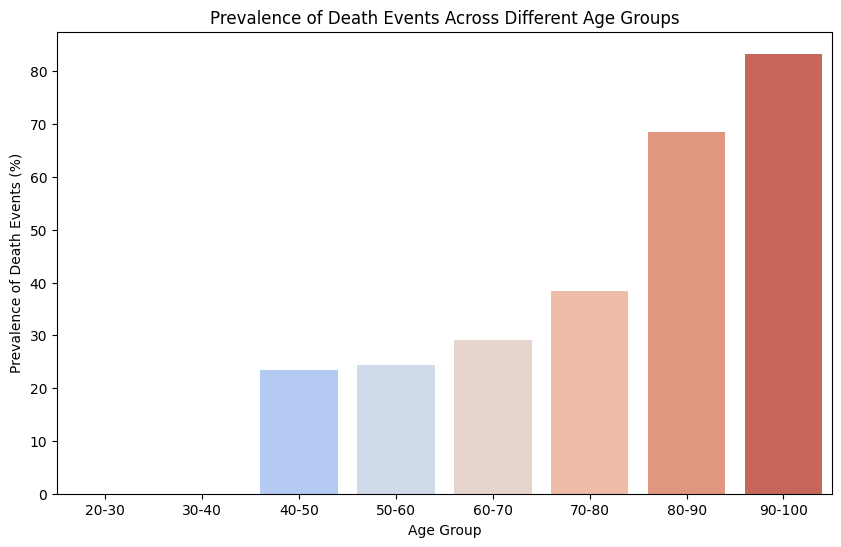

In [33]:
# Create age groups (for example: 20-30, 30-40, etc.)
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate the proportion of death events (DEATH_EVENT = 1) within each age group
age_group_death_event = df.groupby('Age Group')['DEATH_EVENT'].mean() * 100

# Display the prevalence of death events across age groups
print(age_group_death_event)

# Plotting the distribution of death events across age groups
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_death_event.index, y=age_group_death_event.values, palette="coolwarm")

# Adding labels and title
plt.title('Prevalence of Death Events Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Prevalence of Death Events (%)')

# Show plot
plt.show()

#Observation
#As age increases patient of heart failure also increses.


In [34]:
#9- Is there any significant difference in ejection fraction between patients with and without diabetes?

/tmp/ipykernel_135145/350615573.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='ejection_fraction', data=df, palette="Set2")


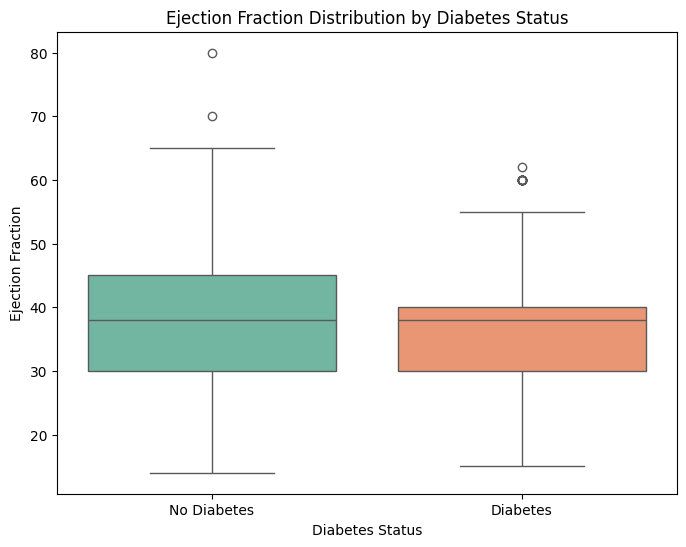

T-statistic: 0.08358970647234736, P-value: 0.9334389630426103
There is no significant difference in ejection fraction between patients with and without diabetes.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Map diabetes values to labels for clarity (0 = No, 1 = Yes)
df['diabetes'] = df['diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'})

# Boxplot to visualize the distribution of ejection fraction between diabetes groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='ejection_fraction', data=df, palette="Set2")

# Adding labels and title
plt.title('Ejection Fraction Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Ejection Fraction')

# Show plot
plt.show()

# Perform a t-test to check if the difference is statistically significant
diabetes_group = df.groupby('diabetes')['ejection_fraction']
no_diabetes = diabetes_group.get_group('No Diabetes')
with_diabetes = diabetes_group.get_group('Diabetes')

# Perform a t-test
t_stat, p_value = stats.ttest_ind(no_diabetes, with_diabetes)

# Display the results of the t-test
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Check if the result is statistically significant (p-value < 0.05 indicates significance)
if p_value < 0.05:
    print("There is a significant difference in ejection fraction between patients with and without diabetes.")
else:
    print("There is no significant difference in ejection fraction between patients with and without diabetes.")


In [39]:
#10- How does the serum creatinine level vary between patients who survived and those who did not?

/tmp/ipykernel_135145/1270792348.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survival Status', y='serum_creatinine', data=df, palette="Set1")


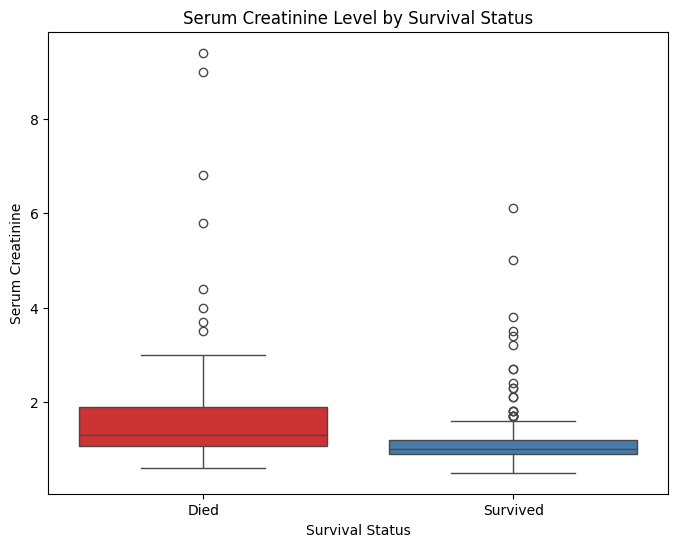

T-statistic: -5.306457599754319, P-value: 2.1901978548979685e-07
There is a significant difference in serum creatinine levels between patients who survived and those who did not.


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Map DEATH_EVENT values to labels for clarity (0 = Survived, 1 = Died)
df['Survival Status'] = df['DEATH_EVENT'].map({0: 'Survived', 1: 'Died'})

# Boxplot to visualize the distribution of serum creatinine between survival status groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survival Status', y='serum_creatinine', data=df, palette="Set1")

# Adding labels and title
plt.title('Serum Creatinine Level by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Serum Creatinine')

# Show plot
plt.show()

# Perform a t-test to check if the difference in serum creatinine levels is statistically significant
survival_group = df.groupby('Survival Status')['serum_creatinine']
survived = survival_group.get_group('Survived')
died = survival_group.get_group('Died')

# Perform a t-test
t_stat, p_value = stats.ttest_ind(survived, died)

# Display the results of the t-test
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Check if the result is statistically significant (p-value < 0.05 indicates significance)
if p_value < 0.05:
    print("There is a significant difference in serum creatinine levels between patients who survived and those who did not.")
else:
    print("There is no significant difference in serum creatinine levels between patients who survived and those who did not.")
